<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Neuroscience of Learning, Memory, Cognition <br>
<font color=2565AE size=5>
    Electrical Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
<font color=0F5208 size=7>
    Adel Movahedian <br>

# Introduction
Local Field Potential (LFP) signals possess the capability to provide us with highly valuable and detailed insights into the functioning of the brain. In this practice, we will undertake the analysis of the LFP signal derived from the brain of an anesthetized rat during an olfactory task. <br>
The LFP signal that is given to you comprises three distinct channels: <br>

&emsp;  1. Hippocampus (HPC) <br>
&emsp;  2. Olfactory Tubercle (OT) <br>
&emsp;  3. Medial Prefrontal Cortex (mPFC) <br>

Throughout the task, the anesthetized rat was exposed to two different odorants: <br>

&emsp;  1. Banana (tag = "20") <br>
&emsp;  2. Lime (tag = "40") <br>

Each odorant was presented with an equal probability of 50%. This implies that 50% of the time, the rat was exposed to the banana odor, and the remaining 50% to the lime odor. Upon cessation of odorant release, the resting state (tag = "10") commenced, devoid of any odor stimuli. <br>

**Note that the 4th channel is digitalByte which contains the events tags [10,20,40] in time.**

`Theorical Question 1:` Investigate the functions of the LFP channels (HPC, OT, mPFC) in rats brain and write a paragraph for each of them. (**Note: Academic references must be used**). *`5 Points`* <br>

Hippocampus (HPC):  [academic paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6961916/#:~:text=Current%20thinking%20predominantly%20attributes%20to,anxiety%2C%20stress%2C%20and%20depression.)<br>
Current thinking predominantly attributes to the hippocampus (HPC) a pivotal role in learning and memory, in spatial navigation, and in anxiety, stress, and depression. However, the central function of the HPC in both memory and neuropsychological disorders may be consistent with an underlying role in internal sensing (interoception).<br>

Olfactory Tubercle (OT):
[academic paper1     ,](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3005978/)          [academic paper2](https://www.sciencedirect.com/topics/neuroscience/olfactory-tubercle)<br>
 the olfactory tubercle has received little attention in terms of elucidating its role in the processing and perception of odors. Instead, research on the olfactory tubercle has mostly focused on its relationship with the reward system. Furthermore, the olfactory tubercle is interconnected with regions involved in reward processing, suggesting its involvement in the integration of olfactory and motivational information .<br>

Medial Prefrontal Cortex (mPFC):
[academic paper1   ,](https://link.springer.com/article/10.1186/s13041-014-0061-2)
[academic paper2](https://link.springer.com/article/10.1007/s007260070051)<br>
mPFC inactivation impaired task performance, highlighting its significance in working memory. Neuronal activity analysis revealed that most mPFC cells exhibited changes in firing frequency correlated with task events, with some tuned to spatial information. Differential activity patterns emerged sequentially along the delay period, suggesting mPFC neurons encode working memory through modulation of firing frequency and synchronization
gamma oscillations in the mPFC are thought to play a role in cognitive control and decision-making processes .the mPFC is involved in the regulation of emotional responses and social behavior, suggesting its role in integrating cognitive and affective information.

# Import Libraries

In [3]:
%pip install pymatreader
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pymatreader
import scipy as sp
import pandas as pd
import math

#################################
# Import your necessary libraries
#################################

Note: you may need to restart the kernel to use updated packages.


# Reading the Data
Import the `data.mat` file that is given to you by using pymatreader library. Add all of the dataset information into the *`data`* dict file. *`5 Points`* 

In [4]:
from pymatreader import read_mat
mat_data = read_mat('data.mat')


data = {}
data['srate'] = 2000                            # Sampling rate
data['channel_names'] = ['HPC','OT','mPFC']     # The name of each channel
data['events'] = ['rest','banana','lime']       # Events names
data['tags'] = [10,20,40]                       # Tag of each event


data['values'] = mat_data['channelData']


# Plot the raw LFP
Let's plot the first `2.5s` of each channels' signal! *`3 Points`*

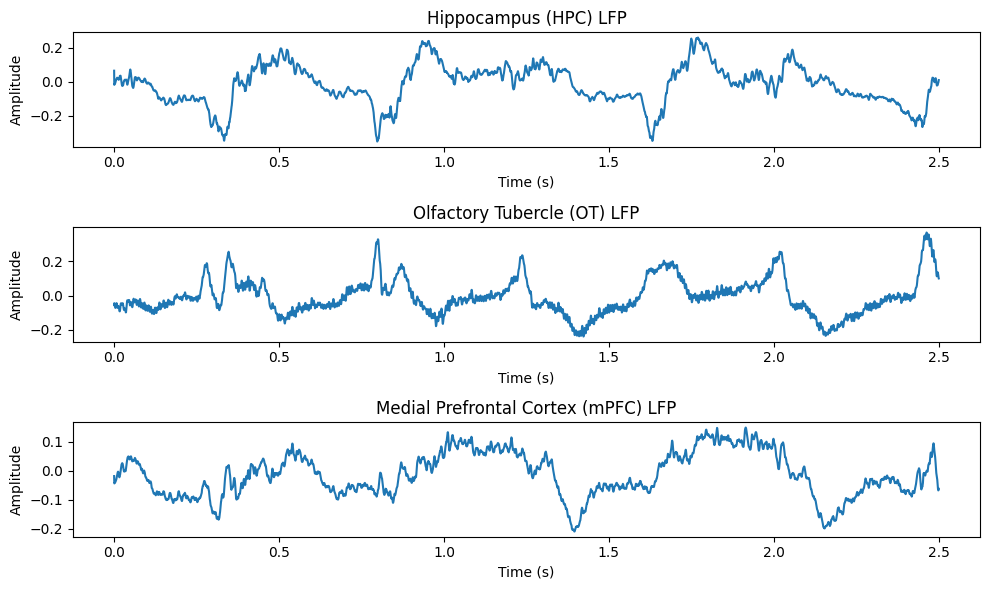

In [5]:

#################################################
# TO DO: plot the raw LFP signal for each channel.
#################################################

time = np.linspace(0, 2.5, int(2.5 * data['srate']))

plt.figure(figsize=(10, 6))

# Plot HPC data
plt.subplot(3, 1, 1)
plt.plot(time, data['values'][:len(time),0])
plt.title('Hippocampus (HPC) LFP')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot OT data
plt.subplot(3, 1, 2)
plt.plot(time, data['values'][:len(time),1])
plt.title('Olfactory Tubercle (OT) LFP')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot mPFC data
plt.subplot(3, 1, 3)
plt.plot(time, data['values'][:len(time),2])
plt.title('Medial Prefrontal Cortex (mPFC) LFP')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Power Spectrum Density (PSD)
Calculate and plot the power spectrum density for the frequency range up to 40Hz in each channel of the raw LFP signals. You can employ a simple FFT for this task. *`5 Points`*

In [6]:
def calc_PSD(data,fs):
    freqs = np.fft.rfftfreq((len(data)),1 / fs)
    psd = np.abs(np.fft.rfft(data)) ** 2 /(fs*(len(data)))
    return freqs , psd

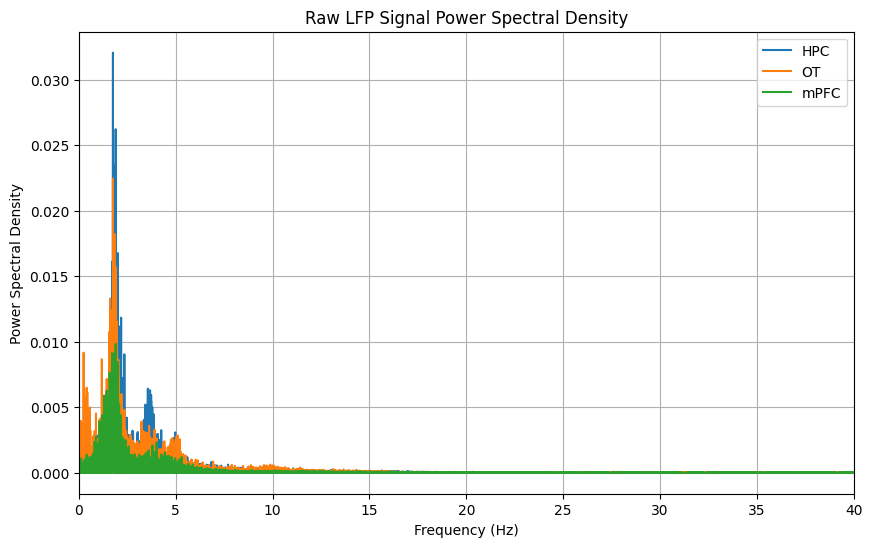

In [7]:
plt.figure(figsize=(10, 6))
labels = ['HPC', 'OT', 'mPFC']
psd = {}
for i in range(3):
    freqs, psd[i] = calc_PSD(data['values'][:,i] ,data['srate'])
    plt.plot(freqs, psd[i], label=labels[i])
plt.xlim(0, 40) #freq between 0 to 40
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('Raw LFP Signal Power Spectral Density')
plt.legend()
plt.grid('minor')
plt.show()

Compute the average power of the theta band (4Hz-8Hz) for each channel and create a bar plot to display the results. *`2 Points`* <br>

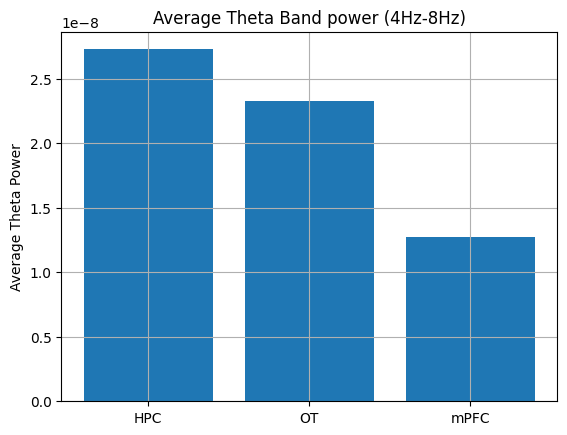

In [8]:

##################################################
# TO DO: Plot the theta band power of each channel
##################################################

channel_names = ['HPC', 'OT', 'mPFC']
def tethaPower(freqs,psd):
    theta_power = np.mean(psd[np.where((freqs > 3) & (freqs < 9))])
    return theta_power
average_theta_powers = []
for i in range(3):
    average_theta_powers.append(tethaPower(freqs,psd[i])/(data['srate']*len(data)))

plt.bar(channel_names, average_theta_powers)
plt.ylabel('Average Theta Power')
plt.title('Average Theta Band power (4Hz-8Hz)')
plt.grid(True)
plt.show()


`Theorical Question 2:` Why is the theta power is higher in the hippocampus compared to other regions? Do a little research :D *`3 Points`*

these are some reasons for the difference mention above :<br>
**1.Network Architecture:** The hippocampus possesses a unique network architecture characterized by recurrent excitatory circuits and specialized cell types, such as pyramidal cells and interneurons. These network properties contribute to the generation and amplification of theta oscillations within the hippocampus.<br>
**2.Input Integration:** The hippocampus receives inputs from various brain regions, including sensory areas, association cortices, and subcortical structures. These inputs converge onto the hippocampal circuitry, where they are integrated and processed. The integration of diverse sensory and cognitive information within the hippocampus is reflected in the theta rhythm, leading to increased theta power during cognitive tasks.<br>
**3.Functional Significance:** Theta oscillations in the hippocampus are closely linked to cognitive processes such as spatial navigation and memory formation. During tasks that require spatial exploration or memory encoding, the hippocampus becomes highly active, leading to an increase in theta power. This increased theta power is thought to facilitate the coordination of neural activity within the hippocampus and enhance memory consolidation and spatial representation.<br>
**4.Theta-Gamma Coupling:** Theta oscillations often exhibit coupling with gamma oscillations (30-100 Hz), forming nested oscillatory patterns known as theta-gamma coupling. This coupling enhances the communication between hippocampal neurons and supports the encoding and retrieval of information. The presence of theta-gamma coupling contributes to the observed increase in theta power within the hippocampus during cognitive tasks.


# Preprocessing
First thing first, filter each channel between 0.5Hz-128Hz. *`3 Points`* <br>
**Note: Use zero-phase filter to maintain the time features of the signals after filtering.**

In [9]:
from scipy.signal import butter,filtfilt

def BPF_filter(data,srate, frq_low, frq_high, filt_order):
    filtered_data = np.zeros(data.shape, dtype=data.dtype)
    filtered_data[:,3] = data[:,3] # we dont change the forth column
    
    nyquist_freq = 0.5 * srate
    low_cutoff = frq_low / nyquist_freq
    high_cutoff = frq_high / nyquist_freq
    
    b, a = butter(filt_order, [low_cutoff, high_cutoff], btype='band')
    for i in range(3):
        filtered_data[:, i] = sp.signal.filtfilt(b, a, data[:,i])
    
    return filtered_data
filtered_data = BPF_filter(data['values'],data['srate'], frq_low=0.5, frq_high=128, filt_order=4)
print(np.shape(filtered_data))

(3596943, 4)


Next, epoch the data according to each event (banana and lime) as you've done at the previous practice. Each trial must contain `1.5` seconds before and `3` seconds after the onset of each stimulus. Consider computing zscore of time series in each trial. *`3 Points`*

In [10]:
def epoch_data(data):
    tags = data[:,3]
    data_epoched = {'data_Banana': np.array([]), 'data_Lime': np.array([])}
    beforeSample = int(1.5 * 2000)
    afterSample = int(3 * 2000)
    offsetSample = int(4.5 * 2000)
    for i in range(1, len(tags)):
        if tags[i] == 20 and tags[i-1] == 0: # banana start if the input jumps 20 points
            banana_Sample = data[i-beforeSample:i+afterSample, :3].reshape((offsetSample, 3, 1))
            if len(data_epoched['data_Banana']) == 0:
                data_epoched['data_Banana'] = banana_Sample
            else:
                data_epoched['data_Banana'] = np.concatenate((data_epoched['data_Banana'], banana_Sample),axis=2)

        elif tags[i] == 40 and tags[i-1] == 0: # lime start if the input jumps 40 points
            lime_sample = data[i-beforeSample:i+afterSample, :3].reshape((offsetSample, 3, 1))
            if len(data_epoched['data_Lime']) == 0:
                data_epoched['data_Lime'] = lime_sample
            else:
                data_epoched['data_Lime'] = np.concatenate((data_epoched['data_Lime'],lime_sample),axis=2)
    return data_epoched

def z_score(data):
    normalized_trials = np.zeros(data.shape, dtype=data.dtype)
    for i in range(data.shape[2]):
        meanOfTrials = np.mean(data[:,:,i],axis=0)
        stdOfTrials = np.std(data[:,:,i],axis=0)
        normalized_trials[:,:,i] = (data[:,:,i] - meanOfTrials)/stdOfTrials
    return normalized_trials

#applying functions
epoched_data = epoch_data(filtered_data)
banana_normalized_trials = z_score(epoched_data['data_Banana'])
lime_normalized_trials = z_score(epoched_data['data_Lime'])
# print(np.shape(banana_normalized_trials))
# print(np.shape(lime_normalized_trials))


# Event-Related Potential (ERP)
Compute the Event-Related Potential (ERP) for each channel and event in all channels as you've done at the previous practice. Plot them for each event. *`5 Points`* <br>
 **Note: Consider using baseline rejection: ERP_signal - mean(ERP_signal(before stimulus))**

In [11]:
def calc_ERP(data):
    return np.mean(data,axis=2)

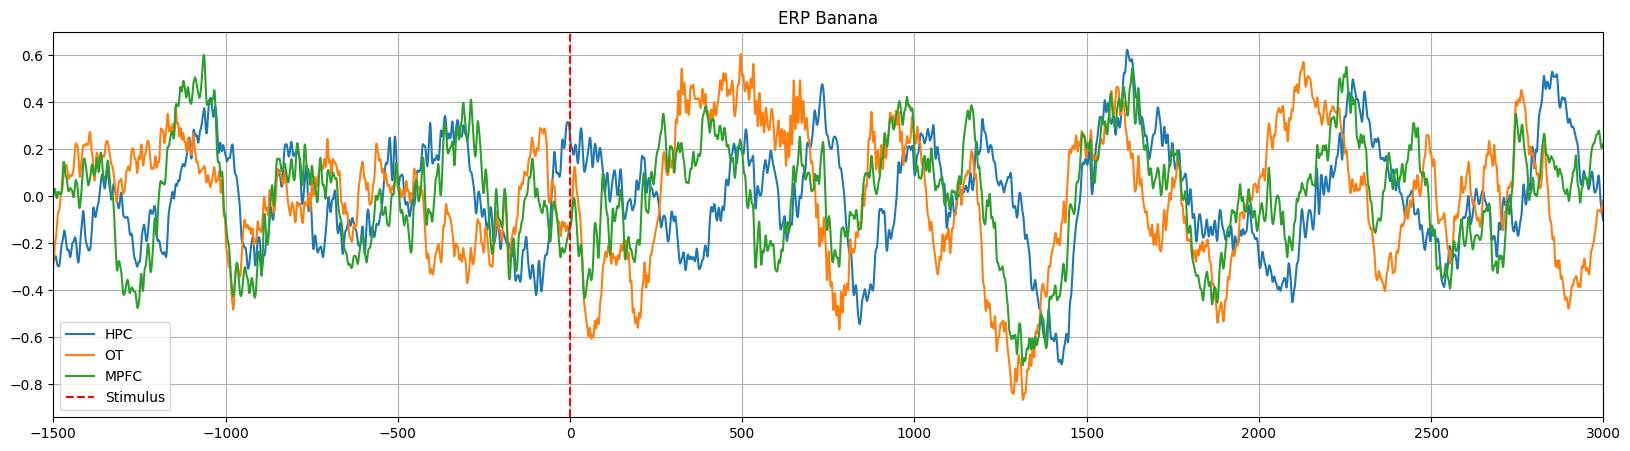

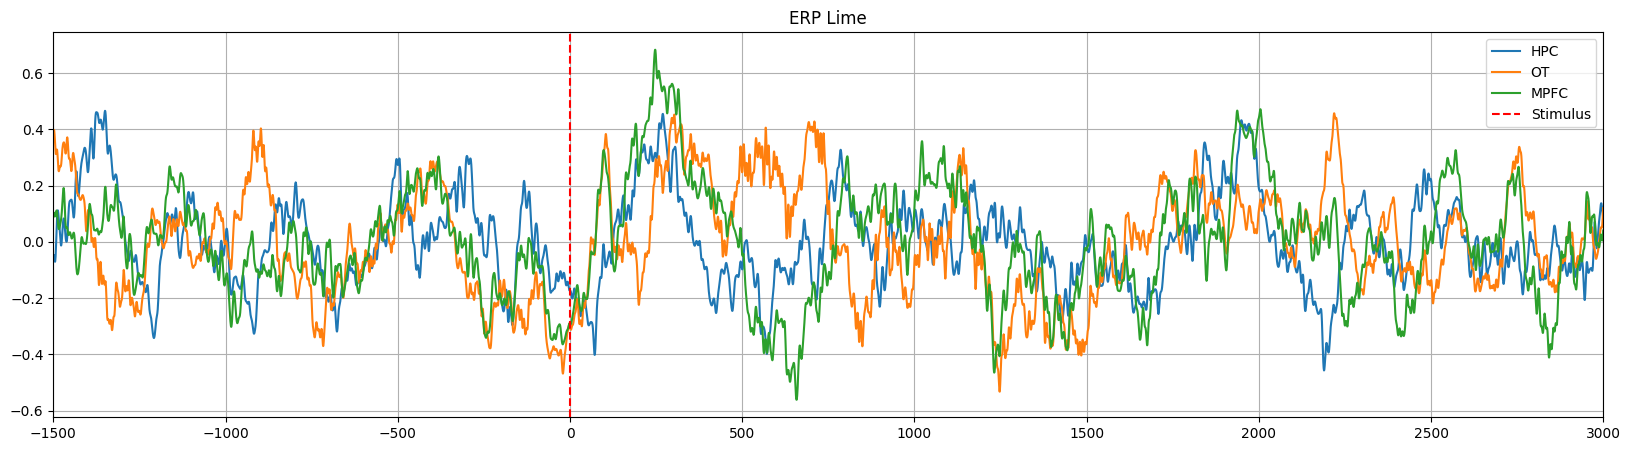

In [12]:
# Calculate the ERP and plot the results for Banana
erps_banana = calc_ERP(banana_normalized_trials)
x_axis_banana = np.arange(len(erps_banana[:,0])) / 2000
x_axis_banana -= 1.5

plt.figure(figsize=(20, 5))
plt.plot(x_axis_banana * 1000, erps_banana[:,0], label='HPC')  # Convert to milliseconds for better visualization
plt.plot(x_axis_banana * 1000, erps_banana[:,1], label='OT')   # Convert to milliseconds for better visualization
plt.plot(x_axis_banana * 1000, erps_banana[:,2], label='MPFC') # Convert to milliseconds for better visualization
plt.axvline(x=0, color='red', linestyle='--', label='Stimulus')
plt.title('ERP Banana')
plt.xlim([-1500, 3000])
plt.grid(True)
plt.legend()
plt.show()

# Calculate the ERP and plot the results for Lime
erps_lime = calc_ERP(lime_normalized_trials)
x_axis_lime = np.arange(len(erps_lime[:,0])) / 2000
x_axis_lime -= 1.5

plt.figure(figsize=(20, 5))
plt.plot(x_axis_lime * 1000, erps_lime[:,0], label='HPC')  # Convert to milliseconds for better visualization
plt.plot(x_axis_lime * 1000, erps_lime[:,1], label='OT')   # Convert to milliseconds for better visualization
plt.plot(x_axis_lime * 1000, erps_lime[:,2], label='MPFC') # Convert to milliseconds for better visualization
plt.axvline(x=0, color='red', linestyle='--', label='Stimulus')
plt.title('ERP Lime')
plt.xlim([-1500, 3000])
plt.grid(True)
plt.legend()
plt.show()


# Phase-Lock Value (PLV)

In the previous practice, you studied the phase-lock value as a method for evaluation of functional connectivity between different parts of brain. Now, we aim to implement it for the olfactory task and investigate the effect of odorants on the connections between channels. You can use [this paper](https://doi.org/10.1016%2Fj.neuroimage.2013.02.008) for more help. <br>

Compute the phase-lock value between different channels for `1.5sec` before and `1.5sec` after the onset of the stimulus for each trials across a frequency range of `20Hz-60Hz` for both odorants. Next, determine the mean and standard error of the calculated phase-lock values across trials. At the end, create a plot showing the bounded lines for phase-lock values at various frequencies. Compare the results before and after stimulus. *`20 Points`*

In [71]:
from scipy.signal import hilbert,butter, filtfilt,decimate

def calc_PLV(data, frq_range, time_range, filt_order):
    # downsampled_data = decimate(data, q=int(2000 / 512), axis=0)
    downsampled_data = data
    n = downsampled_data.shape[2]
    index2 = 0
    frqs = np.linspace(int(frq_range[0]), int(frq_range[1]), 200)
    plv = np.zeros((3, len(frqs), int(n*(n-1)/2)))
    for m in range(downsampled_data.shape[2]):
        for k in range(m+1, downsampled_data.shape[2]):
            for index1, frq in enumerate(frqs):
                frq_range = [frq/1000, (frq+filt_order)/1000]
                b, a = butter(filt_order, frq_range, btype='band')
                analytic_signal_i = hilbert(filtfilt(b, a, downsampled_data[:,:,m], axis=0), axis=0)
                analytic_signal_j = hilbert(filtfilt(b, a, downsampled_data[:,:,k], axis=0), axis=0)
                plv_ph_1 = np.angle(analytic_signal_i[time_range,0]) - np.angle(analytic_signal_j[time_range,1])
                plv_ph_2 = np.angle(analytic_signal_i[time_range,0]) - np.angle(analytic_signal_j[time_range,2])
                plv_ph_3 = np.angle(analytic_signal_i[time_range,1]) - np.angle(analytic_signal_j[time_range,2])
                plv[0, index1, index2] = np.abs(np.mean(np.exp(1j * (plv_ph_1))))
                plv[1, index1, index2] = np.abs(np.mean(np.exp(1j * (plv_ph_2))))
                plv[2, index1, index2] = np.abs(np.mean(np.exp(1j * (plv_ph_3))))
            index2 += 1

    return np.mean(plv, axis=2)
    ##############################
    # To Do: complete the function
    ##############################

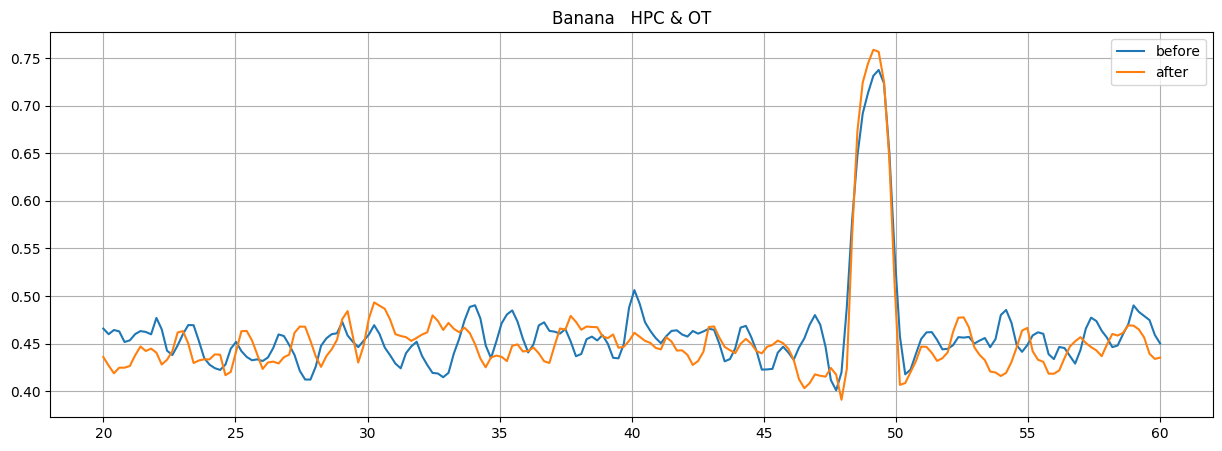

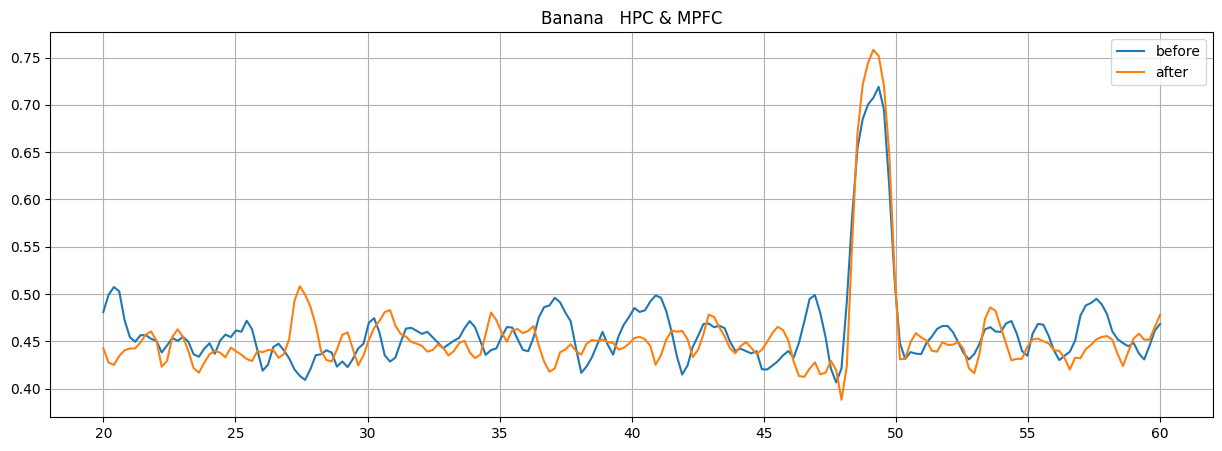

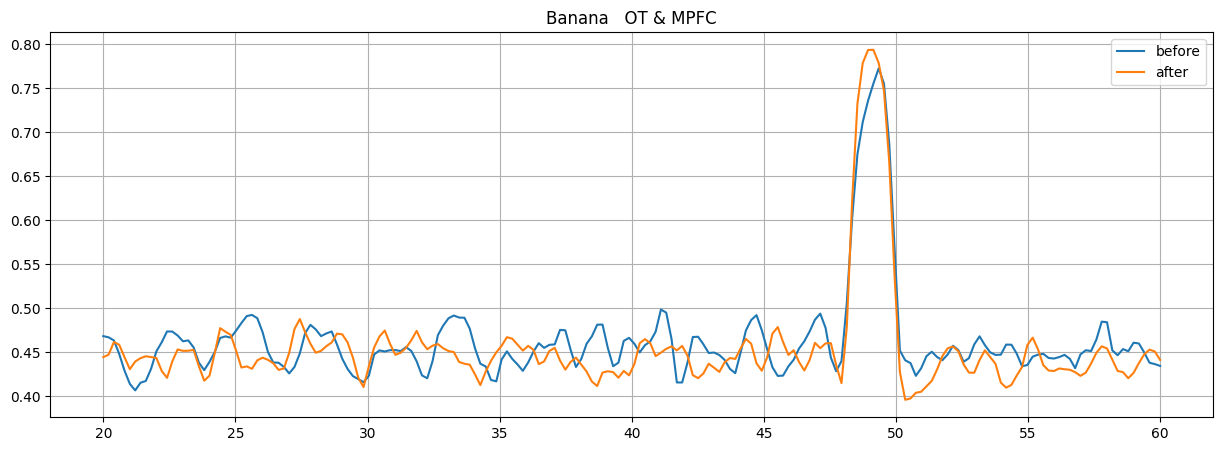

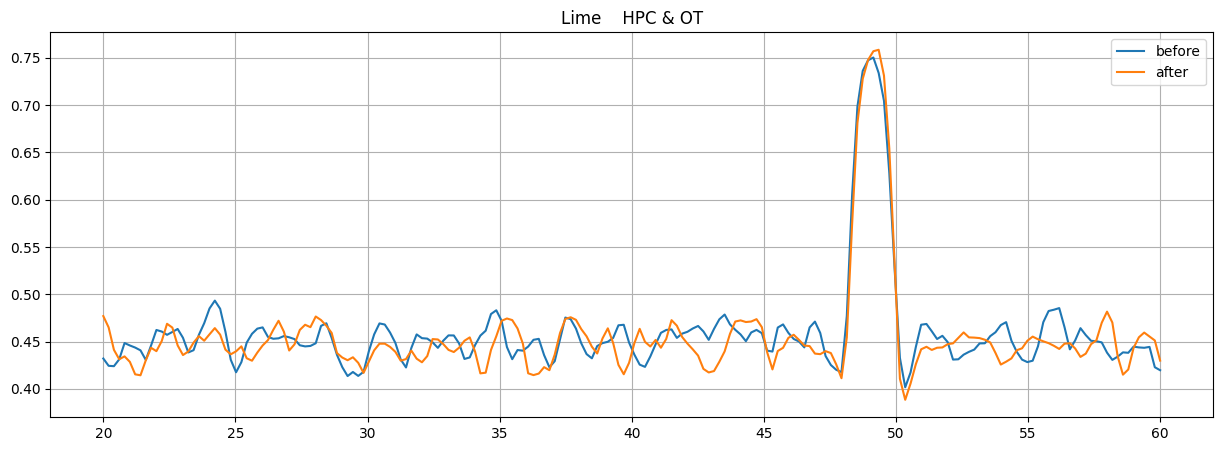

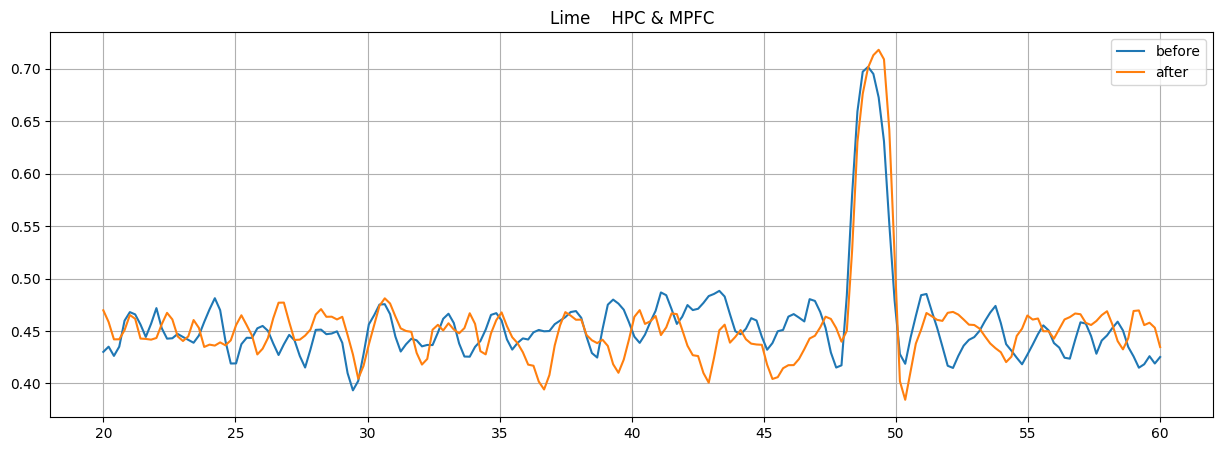

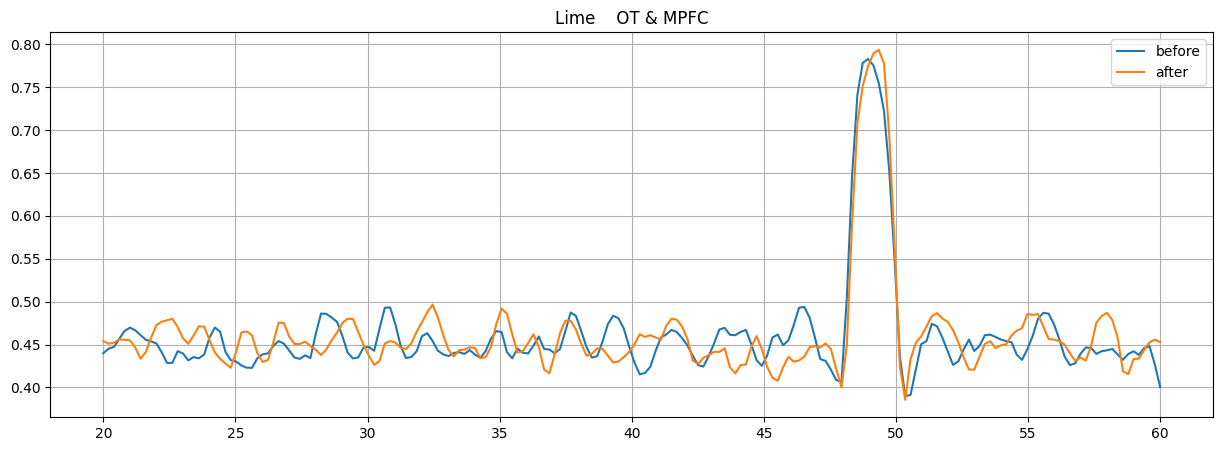

In [70]:
####################################################################
# To Do: Use your function to calculate the PLV and plot the results
####################################################################
time_range_before = np.arange(3001)
time_range_after = np.arange(3000,6001)
freq_range =[20,60]
plv_before_banana = calc_PLV(banana_normalized_trials, freq_range, time_range_before, 2)
plv_after_banana = calc_PLV(banana_normalized_trials, freq_range, time_range_after, 2)
plv_before_lime = calc_PLV(lime_normalized_trials, freq_range, time_range_before, 2)
plv_after_lime = calc_PLV(lime_normalized_trials, freq_range, time_range_after, 2)
t = np.linspace(20, 60, len(plv_before_banana[0, :]))

plt.figure(figsize=(15, 5))
plt.plot(t, plv_before_banana[0, :], label='before')
plt.plot(t, plv_after_banana[0, :], label='after')
plt.title('Banana   HPC & OT')
plt.grid(True)
plt.legend()
plt.figure(figsize=(15, 5))
plt.plot(t, plv_before_banana[1, :], label='before')
plt.plot(t, plv_after_banana[1, :], label='after')
plt.title('Banana   HPC & MPFC')
plt.grid(True)
plt.legend()
plt.figure(figsize=(15, 5))
plt.plot(t, plv_before_banana[2, :], label='before')
plt.plot(t, plv_after_banana[2, :], label='after')
plt.title('Banana   OT & MPFC')
plt.grid(True)
plt.legend()

plt.figure(figsize=(15, 5))
plt.plot(t, plv_before_lime[0, :], label='before')
plt.plot(t, plv_after_lime[0, :], label='after')
plt.title('Lime    HPC & OT')
plt.grid(True)
plt.legend()
plt.figure(figsize=(15, 5))
plt.plot(t, plv_before_lime[1, :], label='before')
plt.plot(t, plv_after_lime[1, :], label='after')
plt.title('Lime    HPC & MPFC')
plt.grid(True)
plt.legend()
plt.figure(figsize=(15, 5))
plt.plot(t, plv_before_lime[2, :], label='before')
plt.plot(t, plv_after_lime[2, :], label='after')
plt.title('Lime    OT & MPFC')
plt.grid(True)
plt.legend()
####################################################################
# To Do: Use your function to calculate the PLV and plot the results
####################################################################

# Phase-Amplitude Coupling (PAC)

One of the recent methods used for studying functional connectivity is Phase-Amplitude Coupling (PAC). This method is widely used to explain the way of communication among various neural populations in the brain. For more detailed information on PAC and how it's calculated, you can refer to [this paper](https://doi.org/10.1038/s41598-019-48870-2). Moreover, [this paper](https://doi.org/10.1038/s41598-019-43272-w) has also explained how different neural networks communicate through their theta and gamma oscillations to transfer information.

`Theorical Question 3:` Read both papers and explain the process of calculating PAC and how we infer PAC as a metric for communication between different neural oscillations. `5 Points`

**Note: You don't have to read both papers in detail; just simply collect the information you NEED :D**

## complete me

Now, we aim to analyze the data and compute the Phase-Amplitude Coupling (PAC) for each channel. First thing first, as explained in [the paper](https://doi.org/10.1038/s41598-019-48870-2) you've read, we need to find the Bilinear time–frequency distribution of the signal using the RID-Rihaczek method. The code for this is provided below:

In [72]:
## DON'T CHANGE THE CODES OF THIS BLOCK

def _rhu(n):
    '''
    Return integer rounded of the input. The half will round up.
    1.3 -> 1
    2.5 -> 3
    -0.5 -> 0
    -0.3 -> -1
    '''
    return int(math.floor(n + 0.5))


def _datawrap(x: np.ndarray, n: int) -> np.ndarray:
    '''
    The calculation of signal spectrum, such as periodogram, uses FFT internally, 
    where the length of FFT is denoted as NFFT. In theory, when using FFT, 
    the signal in both time domain and frequency domain are discrete and periodic, 
    where the period is given by NFFT. Hence, if you specify an NFFT that is less 
    than the signal length, it actually introduces the aliasing in the time domain 
    and make the signal (even if its length is N>NFFT) periodic with NFFT. 
    When you take FFT of this sequence, you are working with this aliased sequence. 
    This is what datawrap do for you. 

    For example: Sequence 1 2 3 4 5, period 5, it returns
        1 2 3 4 5
                  1 2 3 4 5
                            1 2 3 4 5
        --------------------------------
              ... 1 2 3 4 5 ...

    i.e., original series. assume a period of 3, then it looks like

        1 2 3 4 5
              1 2 3 4 5
                    1 2 3 4 5
        ------------------------
          ... 5 7 3 ...

    A sequence that is wrapped around and has only a length of 3.

    >>> _datawrap(range(1, 6),3)
    array([5, 7, 3])

    '''
    return np.array([sum(x[i::n]) for i in range(n)])


def _chwi_krn(D: np.ndarray, L: np.ndarray, A: int = None):
    '''

    CHWI_KRN Choi-Williams kernel function.

    https://en.wikipedia.org/wiki/Bilinear_time%E2%80%93frequency_distribution#Choi%E2%80%93Williams_distribution_function

    K = _chwi_krn(D, L, A) returns the values K of the Choi-Williams kernel function
    evaluated at the doppler-values in matrix D and the lag-values in matrix L.
    Matrices D and L must have the same size. The values in D should be in the range
    between -1 and +1 (with +1 being the Nyquist frequency). The parameter A is
    optional and controls the "diagonal bandwidth" of the kernel. Matrix K is of the
    same size as the matrices D and L. Parameter A defaults to 10 if omitted.

    Copyright (c) 1998 by Robert M. Nickel
    Revision: 1.1.1.1
    Date: 2001/03/05 09:09:36

    Written by: Mahdi Kiani, March 2021

    '''

    if A is None:
        A = 10
    K = np.exp((-1/(A*A)) * (D*D*L*L))

    return K

def rid_rihaczek(x: np.ndarray, fbins: int):
    '''
    Munia, T.T.K., Aviyente, S. Time-Frequency Based Phase-Amplitude
    Coupling Measure For Neuronal Oscillations. Sci Rep 9, 12441 (2019).
    https://doi.org/10.1038/s41598-019-48870-2

    This function computes reduced interference Rihaczek distribution

    Parameter:
        x: signal
        fbins=required frequency bins

    Returns:
        tfd = Generated reduced interference Rihaczek distribution

    Written by: Mahdi Kiani, March 2021
    '''

    tbins = x.shape[0]
    amb = np.zeros((tbins, tbins))
    for tau in range(tbins):
        amb[tau, :] = (np.conj(x) * np.concatenate((x[tau:], x[:tau])))

    ambTemp = np.concatenate(
        (amb[:, _rhu(tbins/2):], amb[:, :_rhu(tbins/2)]), axis=1)
    amb1 = np.concatenate(
        (ambTemp[_rhu(tbins/2):, :], ambTemp[:_rhu(tbins/2), :]), axis=0)

    D = np.outer(np.linspace(-1, 1, tbins), np.linspace(-1, 1, tbins), )
    K = _chwi_krn(D, D, 0.01)
    df = K[:amb1.shape[0], :amb1.shape[1]]
    ambf = amb1 * df

    A = np.zeros((fbins, tbins))
    tbins = tbins - 1

    if tbins != fbins:
        for tt in range(tbins):
            A[:, tt] = _datawrap(ambf[:, tt], fbins)
    else:
        A = ambf

    tfd = np.fft.fft(A, axis=0)

    return tfd

Next, compute the local Phase-Amplitude Coupling (l-PAC) within each channel and the inter-regional PAC (ir-PAC) across different channels for **ERP signals** Calculate these values for each phase and amplitude frequency within a time interval of `1sec` before and `1sec` after the onset of stimulation for both odorants. The phase frequency should be in the theta band `4Hz-8Hz`, and the amplitude frequency should be in the low gamma band `20Hz-60Hz`. Afterwards, plot the comodulograms ([f_phase, f_amplitude, PAC] plot) and compare the results before and after the stimulus. *`20 Points`* <br>

**Note: Ensure that the scale of PACs in plots is equalized before and after the stimulus to make them comparable.** 

In [118]:
def calc_MVL(tfd1, tfd2, fph, famp):
    fph_index = int(fph/2000*2*(tfd1.shape[0]))
    famp_index = int(famp/2000*2*(tfd2.shape[0]))
    angle = np.angle(tfd1[fph_index,:])
    phase = np.exp(1j * angle)
    amplitude = np.abs(tfd2[famp_index,:])
    return np.abs(np.mean(amplitude * phase))

def calc_PAC(data, range_fph, range_famp, time_range=None, res=100):
    fs = 2000
    fa1, fa2 = range_famp
    fp1, fp2 = range_fph

    if time_range is not None:
        tr1, tr2 = map(lambda x: int((x + 1.5) * fs), time_range)
        tfd = rid_rihaczek(data[tr1:tr2], 2 * 8192)
    else:
        tfd = rid_rihaczek(data, 2 * 8192)

    famp_vals = np.linspace(fa1, fa2, res)
    fph_vals = np.linspace(fp1, fp2, res)
    PAC = np.zeros((res, res))
    for val_1 in famp_vals:
        for val_2 in fph_vals:
            i = np.where(famp_vals == val_1)[0][0]
            j = np.where(fph_vals == val_2)[0][0]
            PAC[i, j] = calc_MVL(tfd, tfd, val_2, val_1)
    return PAC

    ##############################
    # To Do: complete the function
    ##############################

In [135]:
fph_range = [4, 8]
famp_range = [20, 60]
time_range = [-1, 0]
time_range_2 = [0, 1]
banana_hpc_b = calc_PAC(erps_banana[:,0], fph_range, famp_range, time_range)
banana_hpc_a = calc_PAC(erps_banana[:,0], fph_range, famp_range, time_range_2)
banana_ot_b = calc_PAC(erps_banana[:,1], fph_range, famp_range, time_range)
banana_ot_a = calc_PAC(erps_banana[:,1], fph_range, famp_range, time_range_2)
banana_mpfc_b = calc_PAC(erps_banana[:,2], fph_range, famp_range, time_range)
banana_mpfc_a = calc_PAC(erps_banana[:,2], fph_range, famp_range, time_range_2)
lime_hpc_b  = calc_PAC(erps_lime[:,0], fph_range, famp_range, time_range)
lime_hpc_a  = calc_PAC(erps_lime[:,0], fph_range, famp_range, time_range_2)
lime_ot_b = calc_PAC(erps_lime[:,1], fph_range, famp_range, time_range)
lime_ot_a = calc_PAC(erps_lime[:,1], fph_range, famp_range, time_range_2)
lime_mpfc_b = calc_PAC(erps_lime[:,2], fph_range, famp_range, time_range)
lime_mpfc_a = calc_PAC(erps_lime[:,2], fph_range, famp_range, time_range_2)
#plot on the next code box
####################################################################
# To Do: Use your function to calculate the PAC and plot the results
####################################################################


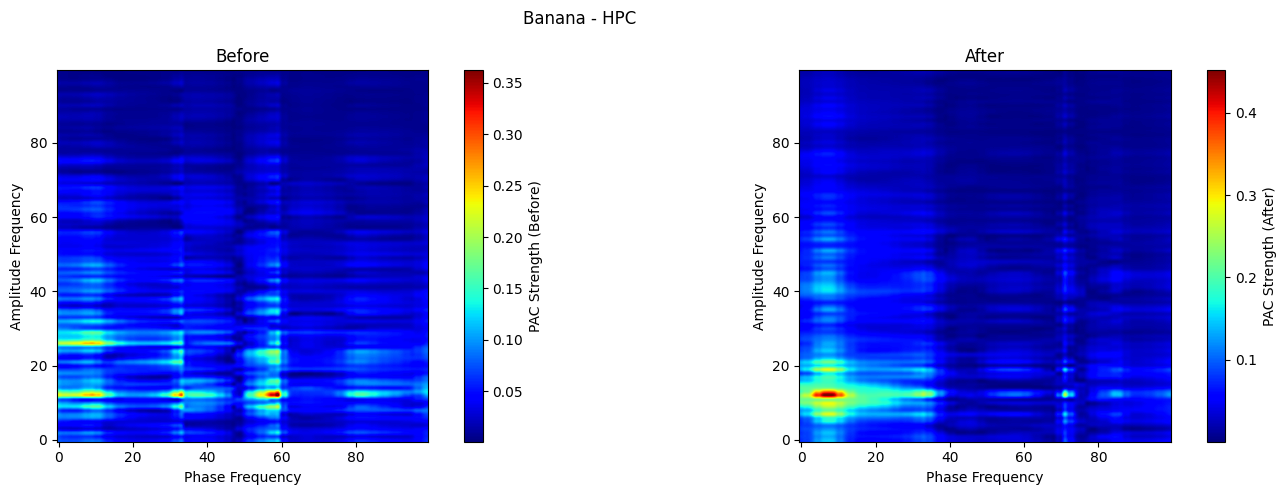

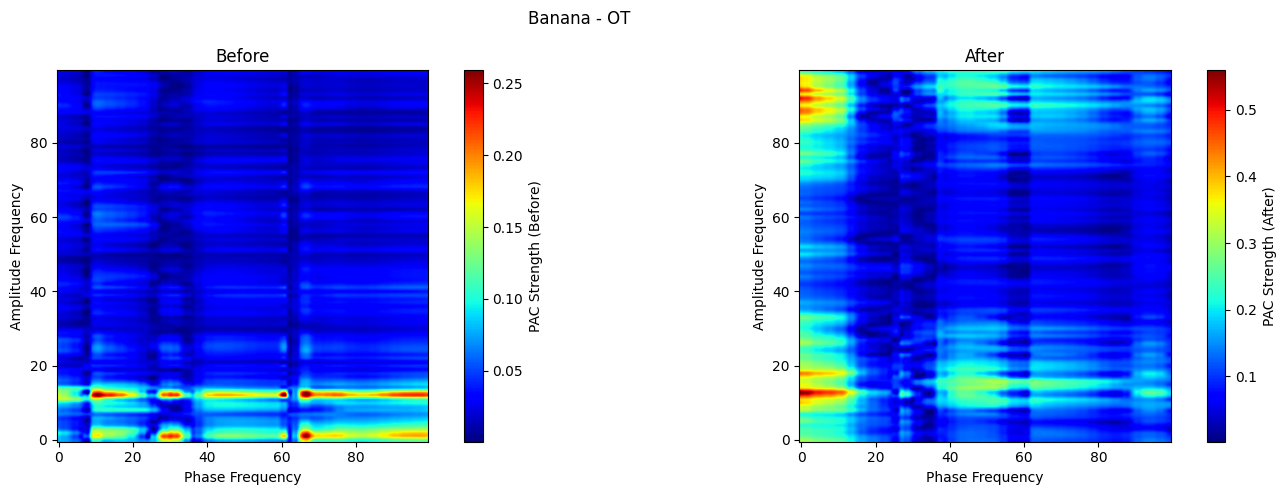

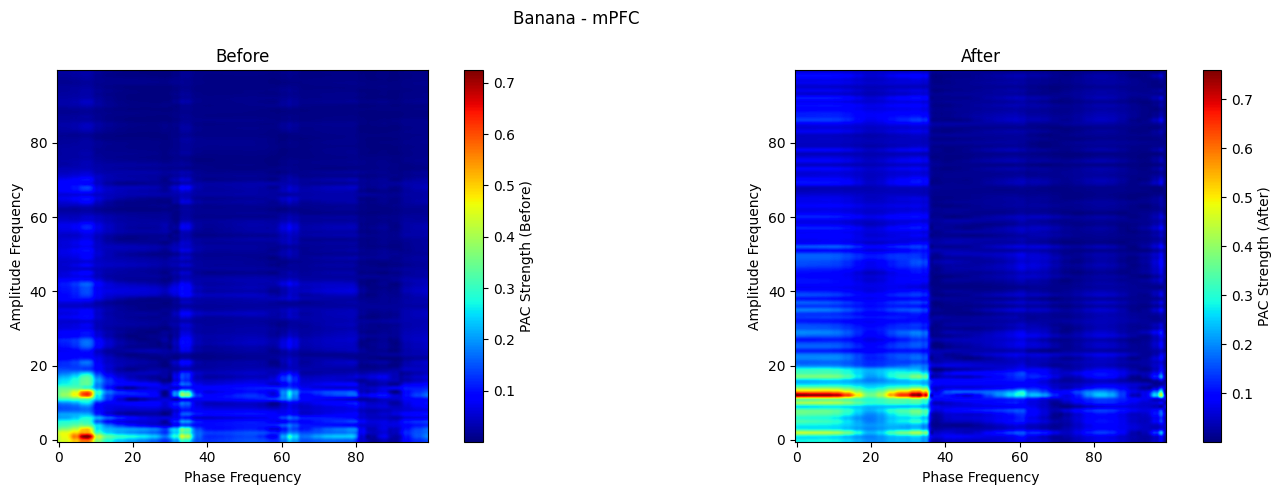

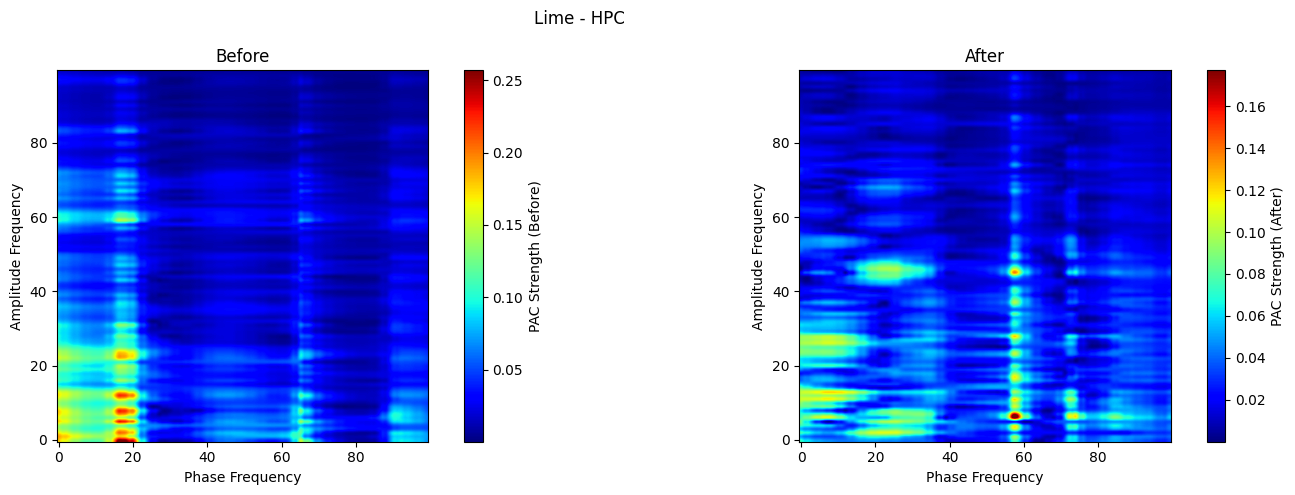

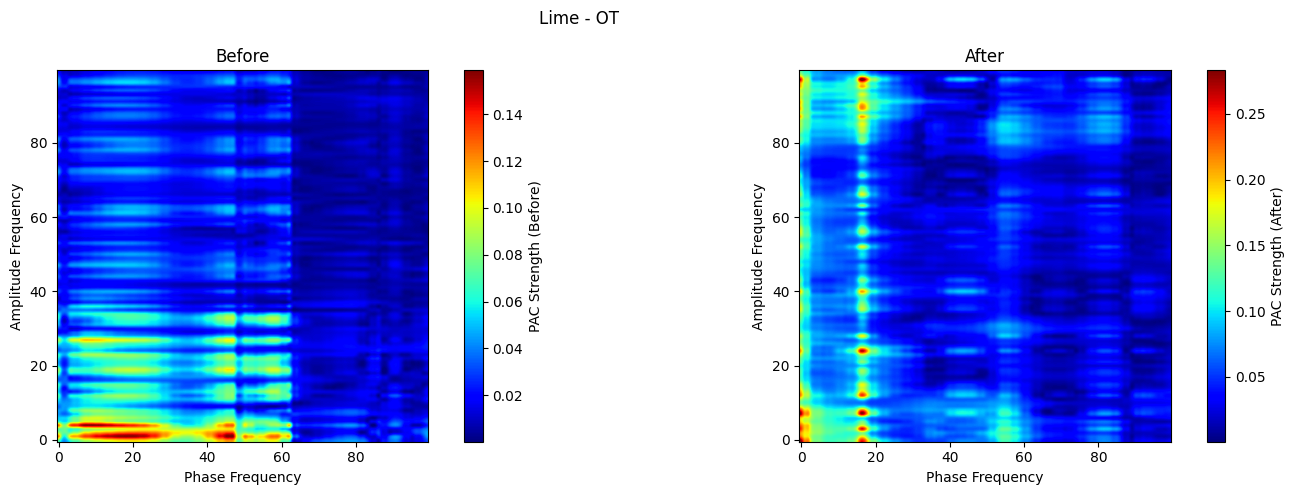

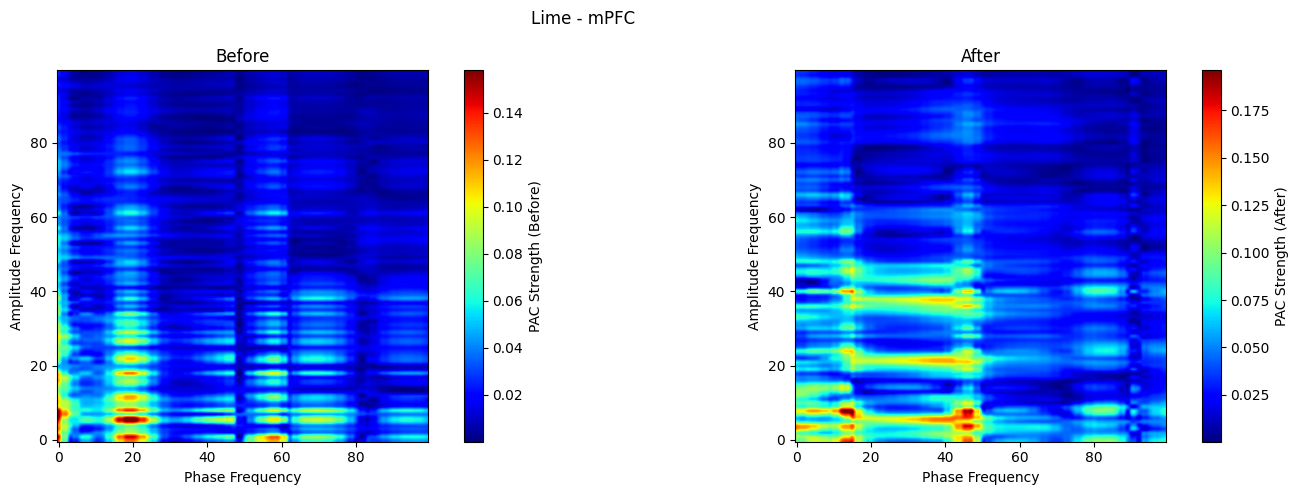

In [136]:
def plot_pac_comparison(before_matrix, after_matrix, title):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5)) 
    fig.suptitle(title) 

    axs[0].imshow(before_matrix, cmap='jet', origin='lower', interpolation='spline16')
    axs[0].set_title('Before')
    axs[0].set_xlabel('Phase Frequency')
    axs[0].set_ylabel('Amplitude Frequency')
    
    axs[1].imshow(after_matrix, cmap='jet', origin='lower', interpolation='spline16')
    axs[1].set_title('After')
    axs[1].set_xlabel('Phase Frequency')
    axs[1].set_ylabel('Amplitude Frequency')
    
    cbar0 = fig.colorbar(axs[0].imshow(before_matrix, cmap='jet', origin='lower', interpolation='spline16'), ax=axs[0])
    cbar0.set_label('PAC Strength (Before)')
    cbar1 = fig.colorbar(axs[1].imshow(after_matrix, cmap='jet', origin='lower', interpolation='spline16'), ax=axs[1])
    cbar1.set_label('PAC Strength (After)')
    plt.tight_layout()
    plt.show()
plot_pac_comparison(banana_hpc_b, banana_hpc_a, 'Banana - HPC')
plot_pac_comparison(banana_ot_b, banana_ot_a, 'Banana - OT')
plot_pac_comparison(banana_mpfc_b, banana_mpfc_a, 'Banana - mPFC')
plot_pac_comparison(lime_hpc_b, lime_hpc_a, 'Lime - HPC')
plot_pac_comparison(lime_ot_b, lime_ot_a, 'Lime - OT')
plot_pac_comparison(lime_mpfc_b, lime_mpfc_a, 'Lime - mPFC')


You should generate plots like this between all channels for both odorants:<br>

![](./Figures/04-PAC-comodulo.png) <br>
*figure description: comodulogram of hippocampus theta phase and hippocampus low gamma amplitude*

# Time-Varying Phase-Amplitude Coupling (tv-PAC)

In this section, we aim to analyze the dynamics of Phase-Amplitude Coupling (PAC) over time. This can be achieved using a sliding window technique. Set the window size to `0.25sec` and slide it with `75%` overlap across the ERP signals for each channel in both odorants. Within each window, calculate the PAC and then average it over the phase frequency range of theta band `4Hz-8Hz`. Finally, generate time-frequency plots for PAC between each pair of channels (local PAC and inter-regional PAC). You can use the `calc_PAC()` function you've written in the previous section. Compare the results and find the effect of odorants in the neural connectivities. *`20 Points`*

In [ ]:
def calc_PAC_over_time(data, range_fph, range_famp, time_range, window_size, overlap, theta_band=(4, 8), res=100):
    fs = 2000
    fa1, fa2 = range_famp
    fp1, fp2 = range_fph
    theta_band_start, theta_band_end = theta_band

    window_size_samples = int(window_size * fs)
    overlap_samples = int(overlap * window_size_samples)
    num_windows = int((len(data) - window_size_samples) / (window_size_samples - overlap_samples)) + 1

    PAC_over_time = np.zeros((num_windows))

    for wi in range(num_windows):
        win_start = wi * (window_size_samples - overlap_samples)
        win_end = win_start + window_size_samples
        win_data = data[win_start:win_end]

        PAC_matrix = calc_PAC(win_data, (fp1, fp2), (fa1, fa2), time_range=None, res=res)
        theta_band_indices = np.where((PAC_matrix[:, 0] >= theta_band_start) & (PAC_matrix[:, 0] <= theta_band_end))[0]
        avg_PAC_theta_band = np.mean(PAC_matrix[theta_band_indices, :])

        PAC_over_time[wi] = avg_PAC_theta_band

    return PAC_over_time


fph_range = [4, 8]
famp_range = [20, 60]
twin = 0.25
ol = 0.75

banana_hpc_pac_over_time = calc_PAC_over_time(erps_banana[:,0], fph_range, famp_range, time_range=None, window_size=twin, overlap=ol)
banana_ot_pac_over_time = calc_PAC_over_time(erps_banana[:,1], fph_range, famp_range, time_range=None, window_size=twin, overlap=ol)
banana_mpfc_pac_over_time = calc_PAC_over_time(erps_banana[:,2], fph_range, famp_range, time_range=None, window_size=twin, overlap=ol)

lime_hpc_pac_over_time = calc_PAC_over_time(erps_lime[:,0], fph_range, famp_range, time_range=None, window_size=twin, overlap=ol)
lime_ot_pac_over_time = calc_PAC_over_time(erps_lime[:,1], fph_range, famp_range, time_range=None, window_size=twin, overlap=ol)
lime_mpfc_pac_over_time = calc_PAC_over_time(erps_lime[:,2], fph_range, famp_range, time_range=None, window_size=twin, overlap=ol)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.imshow([banana_hpc_pac_over_time, banana_ot_pac_over_time, banana_mpfc_pac_over_time], cmap='jet', aspect='auto', extent=[0, len(banana_hpc_pac_over_time), 0, 2], origin='lower')
plt.title('Banana Condition')
plt.xlabel('Time Windows')
plt.ylabel('Channels')
plt.colorbar(label='Average PAC (Theta Band)')
plt.xticks(np.arange(0, len(banana_hpc_pac_over_time)+1, 1))
plt.yticks([0, 1, 2], ['HPC', 'OT', 'mPFC'])

plt.subplot(2, 1, 2)
plt.imshow([lime_hpc_pac_over_time, lime_ot_pac_over_time, lime_mpfc_pac_over_time], cmap='jet', aspect='auto', extent=[0, len(lime_hpc_pac_over_time), 0, 2], origin='lower')
plt.title('Lime Condition')
plt.xlabel('Time Windows')
plt.ylabel('Channels')
plt.colorbar(label='Average PAC (Theta Band)')
plt.xticks(np.arange(0, len(lime_hpc_pac_over_time)+1, 1))
plt.yticks([0, 1, 2], ['HPC', 'OT', 'mPFC'])

plt.tight_layout()
plt.show()
